<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

#The number of rows in the dataset is 294478

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

#The number of unique users in the dataset is 29084

290584

d. The proportion of users converted.

In [5]:
'''Proportion is the number of unique users converted divided by the total number of unique users'''
df.query('converted == 1').user_id.nunique() / df.user_id.nunique()

#It's approximately 12%

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
'''Conditioning the data set when group is treatment and the landing page is not new page + vice versa'''
df.query('group == "treatment" and landing_page != "new_page"').user_id.nunique() + df.query('group != "treatment" and landing_page == "new_page"').user_id.nunique()

#The number of times the new_page and treatment don't match each other 3893


3893

f. Do any of the rows have missing values?

In [7]:
'''Accessing the null values in our data set'''
df[df.isnull().any(axis=1)]

#There are none of missing values in rows.

,user_id,timestamp,group,landing_page,converted


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
'''Break the two conditions down into two steps to avoid any mis-applying for the changed indexes accordingly'''
df = df.drop(df[(df.group == 'treatment') & (df.landing_page != 'new_page')].index)
df2 = df.drop(df[(df.group != 'treatment') & (df.landing_page == 'new_page')].index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
'''Get the duplicated row'''
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
'''Get the duplicated rows along using KEEP=FASLE to be shown together'''
df2[df2.user_id.duplicated(keep=False)]

#Both are similar, but only the visit time is different 

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop(1899, inplace = True)

In [14]:
'''Checking if dropping went well'''
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df2.query('group == "control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
df2.query('landing_page == "new_page"').shape[0]/ df2.landing_page.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

I believe that there is no such sufficient evidence for treatment page leading more conversion, because when we consider the probability of "treatment" group converted, 11.8% meanwhile it's approximately 12% of "control" group.
As well, only 50% of our population received the "new page", and the rest didn't, so it's not enough to launch the new page just based on lower percentage of visiting the website (11.8%)


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}$ (Null) = the conversion rate of old_page is >= the conversion rate of new_page
$H_{1}$ (Alternative) = the conversion rate of old_page is < the conversion rate of new_page

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
# Convert rate for new_page
p_new= df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
# Convert rate for p_old
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [21]:
'''N_new would be the number of users that apprached the new page'''
n_new = df2.query('landing_page == "new_page"').user_id.count()
n_new

145310

d. What is $n_{old}$?

In [22]:
'''N_old would be the users that still appraching the old page'''
n_old =  df2.query('landing_page == "old_page"').user_id.count()
n_old

145274

In [23]:
'''Calculating p_new - p_old'''
p_new - p_old

#Here we can see that there is no difference in conversion based on the page, both are the same

0.0

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
'''Simulating samples using binomial distribution since we have all the simple data,
 taking into consideration that looping simulations as the standard method took too much time to run and interrupting the environment'''
npage_converted = np.random.binomial(1, p_new, n_new)
# Convert rate of p_new
npage_converted.mean()

0.11867042873855894

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
opage_converted = np.random.binomial(1, p_old, n_old)
# Convert rate of p_old
opage_converted.mean()

0.1185415146550656

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
npage_converted.mean() - opage_converted.mean()

0.000128914083493345

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
#Bootstrapping 10,000 iterations
p_diffs = []
for d in range(10000):
    converted_npage = np.random.binomial(1, p_new, n_new)
    converted_opage = np.random.binomial(1, p_old, n_old)
    p_diffs.append( converted_npage.mean() - converted_opage.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

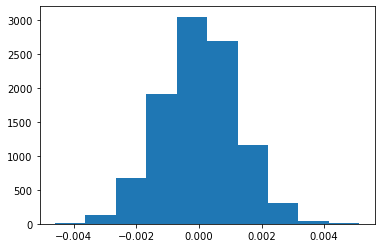

In [28]:
'''Converting the p_diffs to np.array before Plotting'''
p_diffs = np.array(p_diffs)
'''Plotting the difference distribution we got'''
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
'''Get the observed difference from the data between the original new_page and old_page of landing pages ''' 
new_page_df = df2.query('landing_page== "new_page"')
old_page_df = df2.query('landing_page == "old_page"')
obs_diff = new_page_df.converted.mean() - old_page_df.converted.mean()
obs_diff

-0.0015782389853555567

In [30]:
'''Create distribution under the null hypothesis'''
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

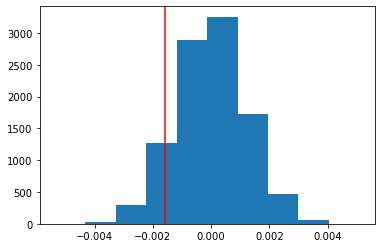

In [31]:
'''Display where the observed difference falls in the distribution'''
plt.hist(null_vals);
plt.axvline(x=obs_diff, c='r');

In [32]:
'''compute p value of null_values greater than the observed'''
(null_vals > obs_diff).mean()

0.9072

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Approximately, 0.9 is the "p-value" > 0.05 "alpha"  which indicates that we do not have statistical significance to reject the null hypothesis $H_{0}$, and there is no evidence that the new_page has conversion rate greater than the old_page. In fact this supports our initial probability studies in the first place. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').shape[0]
n_old = df2.query('landing_page == "old_page"').user_id.count()
n_new = df2.query('landing_page == "new_page"').user_id.count()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [34]:
print('This is number of converted users for new page {}'.format(convert_new))
print('This is number of converted users for old page {}'.format(convert_old))
print('Number of new_page users is {}'.format(n_new))
print('Number of old_page users is {}'.format(n_old))


This is number of converted users for new page 17264
This is number of converted users for old page 17489
Number of new_page users is 145310
Number of old_page users is 145274


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [35]:
#statsmodels.stats.proportion.proportions_ztest(count, nobs, value=None, alternative='two-sided/smaller/larger', prop_var=False)
z_score, p_value  = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')

print(z_score, p_value) 

1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Z_score and p_value computed the standard deviation above or below the population mean, Z-score actually positive and that indicates to it's above the mean, and p_vale is initially > alpha 0.05 so both lead us to accept the null hypothesis

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We need to apply logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [37]:
# Creating the intercept of our dataset
df2['intercept'] = 1
# Creating the dummies of landing_page changing the new_page name to be ab_page to be alligned with the context
df2[['ab_page', 'old_page']] = pd.get_dummies(df['landing_page'])

# Dropping the old_page column since it is out of our spot right now
df2 = df2.drop ('old_page', axis = 1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [38]:
# Creating our logistic model for conversion
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
# Fitting the model
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
# Getting the summary of our results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Apr 2022   Pseudo R-squ.:               8.077e-06
Time:                        23:19:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

P-value is 0.190, and it's different because as it's commonly known that logistic regression is a two tailed test.
On the other hand, it is still greater than the assumed alpha (0.05), so it's the same decision, accepting the null hypothesis H0

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

I believe that other elements might influence our model to dig deeper into our statistics, such as age or the country of users

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [41]:
# Reading our new dataset
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [42]:
# Getting the values of country column
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [43]:
### Create the necessary dummy variables for the country column
df_new[['US', 'UK', 'CA']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [44]:
### Fit Your Linear Model And Obtain the Results
df_new['intercept'] = 1
df_new['US_ab'] = df_new['US'] * df_new['ab_page']
df_new['UK_ab'] = df_new['UK'] * df_new['ab_page']
#Dropping CA column as our baseline out of the three
log_model = sm.Logit(df_new['converted'], df_new[['intercept', 'US', 'UK', 'US_ab', 'UK_ab']])
result = log_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Fri, 08 Apr 2022   Pseudo R-squ.:               2.417e-05
Time:                        23:19:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2729
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
US            -0.0073      0.037     -0.196      0.844      -0.080       0.065
UK             0.0045      0.018      0.257      0.797      -0.030       0.039
US_ab         -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK_ab          0.0108      0.023      0.475      0.635      -0.034       0.056
==============================================================================
"""

In conclusion, we don't have significant evidence for new_page (ab_page) even in both countries (US, and UK) conversion rate higher than the old_page. Thus, we can't advise the e-commerce website to keep the new landing page. It's preferable either to keep the old page as it is, or to work on developing another page to be tested.

Resources:
http://www.statisticshowto.com/probability-and-statistics/z-score/

https://www.youtube.com/watch?v=gMHwogzqPOk